##### 14-Feb-2020

## Time Series Concept

4 Parts of any Time Series data
1. Trend - Fluctuations in short duration of time   
(perhaps due to social media influence among others)
2. Seasonality - Fluctuations based on Season   
(like umbrellas in monsoon, sweaters in winter etc)
3. Cyclicity - Fluctuations in long term say like in 5 to 7 years   
(due to recession, inflation, politics etc)
4. Irregular - Noise data that cannot be explained   
(sudden announcement of trade war)

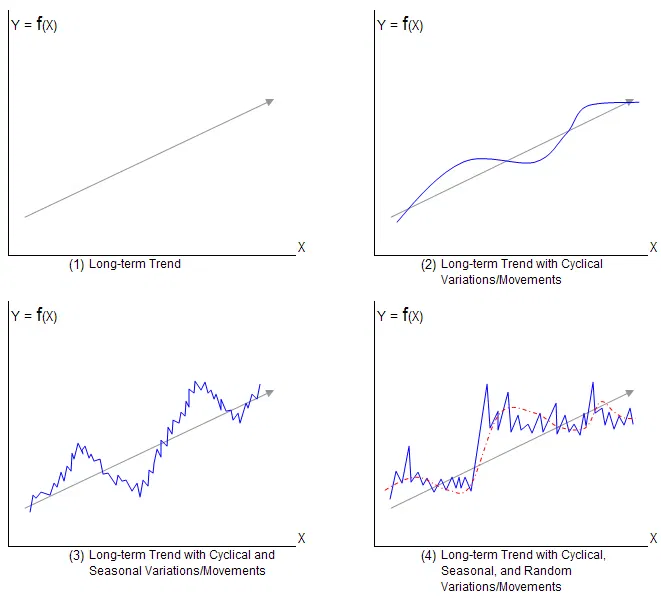

Two Types of Time Series Model  
1. Traditional Model
2. Auto Regressive Model

Traditional Model  
1. Simple Moving Average
2. Weighted Moving Average
3. Simple Exponential Moving Average

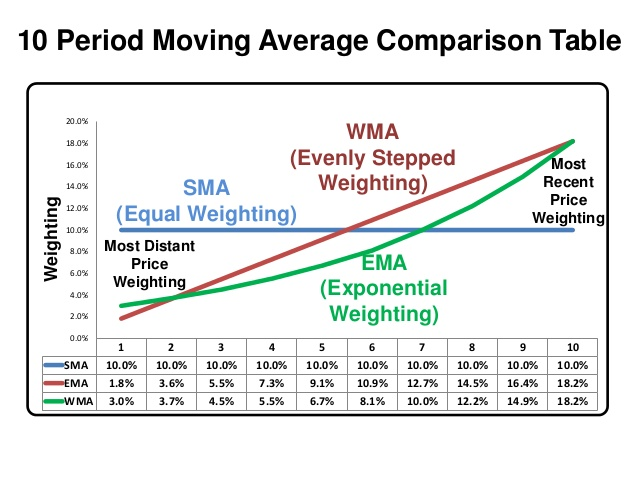

In [3]:
import os
import itertools
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

plt.style.use('fivethirtyeight')

For time series data, it is important to read the data such that the index column contains the time series.

In [46]:
df = pd.read_csv('Co2.csv', index_col=0)
df.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [47]:
print(df.shape)

(2284, 1)


In [48]:
print(df.isnull().sum())

co2    59
dtype: int64


## Indexing with Time Series Data

We need to make sure that dates are used as as index, which we can do by running the following code.

In [49]:
print(df.index)

Index(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19', '1958-04-26',
       '1958-05-03', '1958-05-10', '1958-05-17', '1958-05-24', '1958-05-31',
       ...
       '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17', '2001-11-24',
       '2001-12-01', '2001-12-08', '2001-12-15', '2001-12-22', '2001-12-29'],
      dtype='object', length=2284)


Check for dtype: 
The dtype of the index column shoud be datetime[ns] and not float. Lets check the dtype using the info function.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2284 entries, 1958-03-29 to 2001-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7+ KB


As it is in float format, we need to convert the index into datetime format.  
This we do using the to_datetime function.

In [27]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq=None)

From the above output we see that the dates are in weekly format.  
Weekly data can be tricky to work with.  
Hence it is better to convert it into monthly averages data.  
This can be obtained by using the resampling function.

In [28]:
y = df.co2.resample("MS").mean()
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

Lets look at the min and max of the data

In [31]:
y.index.min(), y.index.max()

(Timestamp('1958-03-01 00:00:00', freq='MS'),
 Timestamp('2001-12-01 00:00:00', freq='MS'))

In [35]:
print("min = ",y.index.min(), "\nmax = ",y.index.max())

min =  1958-03-01 00:00:00 
max =  2001-12-01 00:00:00


From the above output, we see that we have data from March 1958 to December 2001.

Lets see some data manipulation using datetime data.

1. Show all data from year 1990 to end

In [16]:
y["1990":]

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
               ...   
2001-08-01    369.425
2001-09-01    367.880
2001-10-01    368.050
2001-11-01    369.375
2001-12-01    371.020
Freq: MS, Name: co2, Length: 144, dtype: float64

2. Show all data from October 1995 to October 1996

In [37]:
y["1995-10-01":"1996-10-1"]

1995-10-01    357.850
1995-11-01    359.475
1995-12-01    360.700
1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
1996-06-01    364.880
1996-07-01    363.475
1996-08-01    361.320
1996-09-01    359.400
1996-10-01    359.625
Freq: MS, Name: co2, dtype: float64

#### Handling missing values in Time-series Data

In [18]:
y.isnull().sum()

5

In [38]:
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

There are multiple ways in which you can fill the null values.
1. Forward filling
2. Backward filling
3. Linear Interpolation
4. Moving Average

Forward filling: Uses previous month's data to fill next record.

In [41]:
y_f = y.fillna(y.ffill())
y_f.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    317.433333
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

Bakcward Filling: Uses next months' data to fill previous record.

In [39]:
y_b = y.fillna(y.bfill())
y_b.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

Linear Interpolation: Takes the average of the previous and next record  
If there are multiple missing values in series, it adjusts the imputed values in a linear fashion between the preceeding record and the succeeding record.

In [44]:
y_inter = y.interpolate()
y_inter.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    316.529167
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

Rolling: Provides rolling window calculations  
DataFrame.rolling(window, min_periods=1).mean()

In [50]:
y_3 = y.fillna(y.rolling(3,min_periods=1,).mean())
y_3.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    317.316667
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [55]:
y_r = y.rolling(3,min_periods=1).sum()
y_r.head()

1958-03-01    316.100000
1958-04-01    633.300000
1958-05-01    950.733333
1958-06-01    634.633333
1958-07-01    633.058333
Freq: MS, Name: co2, dtype: float64

In [57]:
y = y.interpolate()
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    316.529167
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

### Visualizing Time series Data

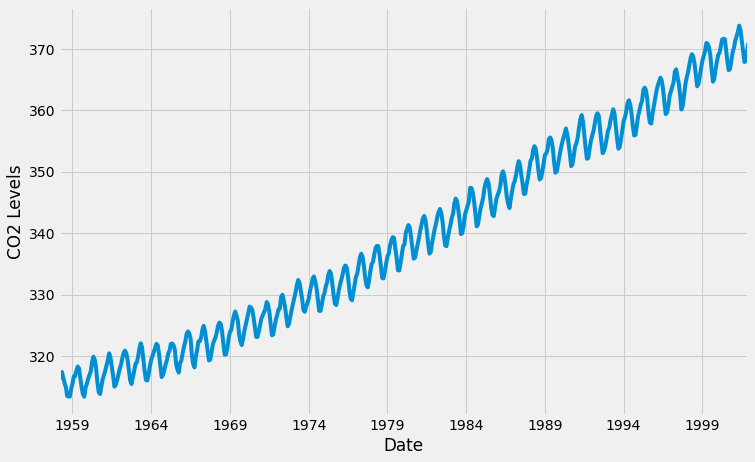

In [65]:
y.plot(figsize = (11,7))
plt.xlabel("Date")
plt.ylabel("CO2 Levels")
plt.grid(True)
plt.show();

### Time Series Decomposition

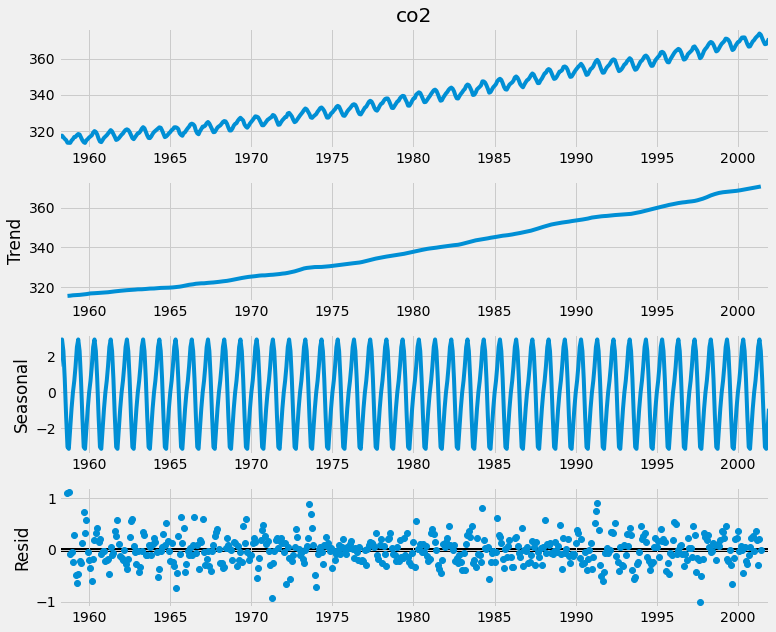

In [61]:
from pylab import rcParams
rcParams["figure.figsize"] = 11,9
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show();

### Additive vs Multiplicative Time Series

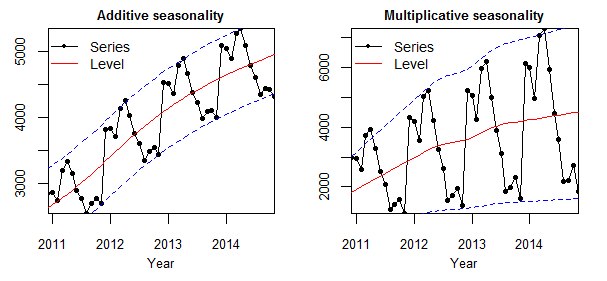

Additive Nature Example:  
A restaurant has tied up with a college that is open only on weekdays.   
If a fixed number of students exist, the restaurant will get that many number of orders in addition to its normal customers. This scenario is additive in nature, where demand for food on weekdays adds by the number of students.  
y(demand) = x1(normal demand) + x2(demand on weekdays due to students) + irregular component  

Multiplicative Nature Example:  
Consider the case of another restuarant.  
This restaurants demand has increased due to combination of increase in students over time independent of weekdays or weekends.  
y(demand) = x1(normal demand) * x2(population growth %)

### Stationary vs Non-Stationary

Time Series is considered Sationary when
1. Mean is constant
2. Variance is constant
3. Co-variance is constant

White Noise Time Series - When there is no pattern, can't be explained

Random Walk Time Series - There is trend, but variance is random

Why is Stationary so important?
1. Easier to analyze because statistical properties remain constant over time
2. Linear Regression, Autoregression is built on assumption that all variables are independent

Stationary Tests
1. KPSS
2. ADF

How to make it stationary? By doing differentiation, first, second or thrid order till the values come close